In [46]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
date = pd.read_excel("date.xlsx")
date.isnull().sum()

Unnamed: 0     0
time_point     0
aqi            0
pm2_5          0
pm10           0
so2            0
no2            0
co             0
o3             0
rank          35
quality        0
dtype: int64

In [5]:
%matplotlib inline

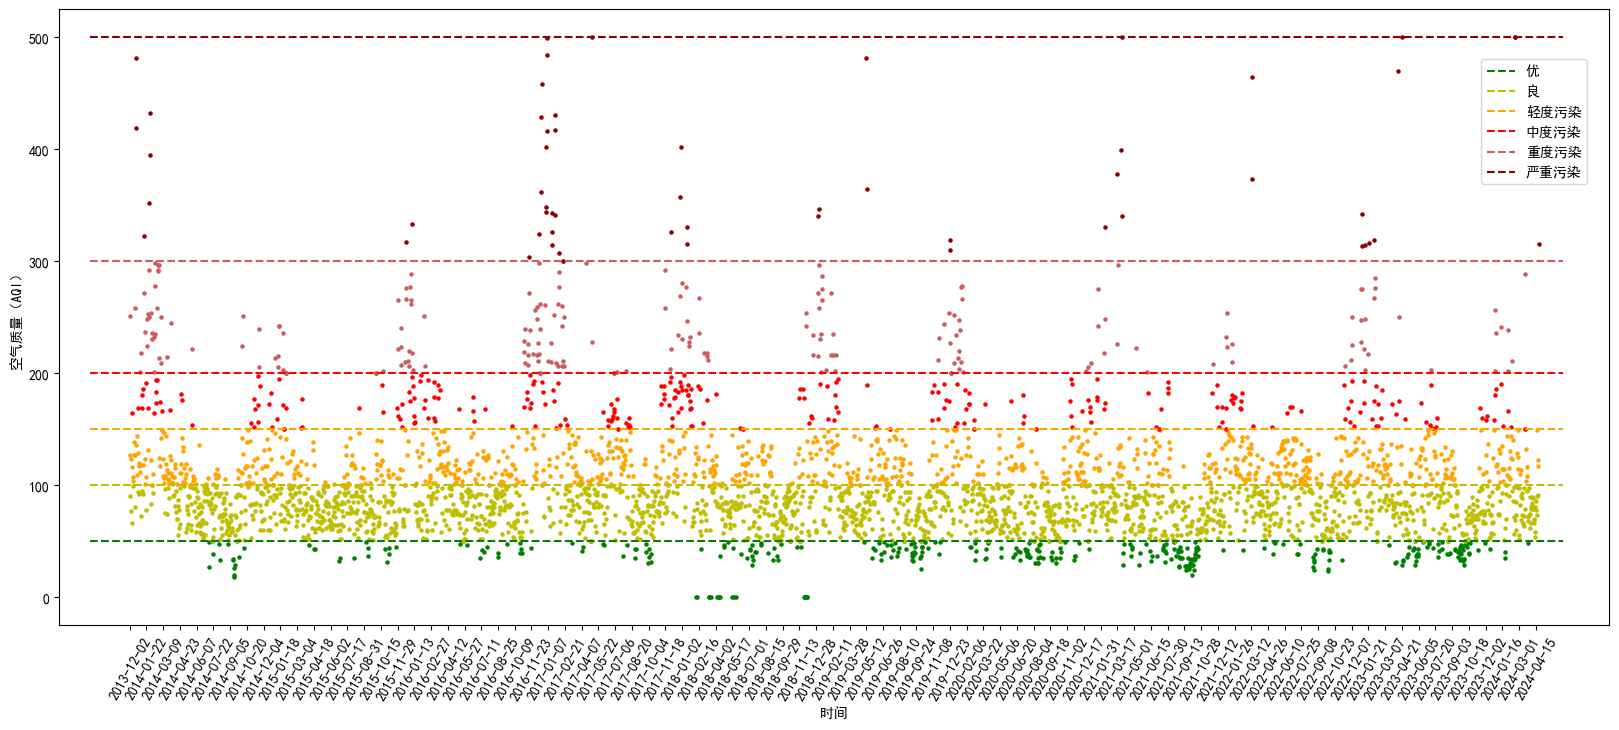

In [10]:
#画出全部AQI
x = date['time_point']
y = date['aqi']
z = date['rank']
o = date['pm2_5']
p = date['pm10']
q = date['so2']
r = date['no2']
s = date['co']
t = date['o3']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20, 8))
a = 50
b = 100
c = 150
d = 200
e = 300
f = 500
aa = np.ma.masked_where(y > a, y)
bb = np.ma.masked_where((y < a) | (y > b), y)
cc = np.ma.masked_where((y < b) | (y > c), y)
dd = np.ma.masked_where((y < c) | (y > d), y)
ee = np.ma.masked_where((y < d) | (y > e), y)
ff = np.ma.masked_where(y < e, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)

plt.axhline(y=50, xmin=0.02, xmax=0.97, color='g', linestyle="--", label='优')
plt.axhline(y=100, xmin=0.02, xmax=0.97, color='y', linestyle="--", label='良')
plt.axhline(y=150, xmin=0.02, xmax=0.97, color='orange', linestyle="--", label='轻度污染')
plt.axhline(y=200, xmin=0.02, xmax=0.97, color='r', linestyle="--", label='中度污染')
plt.axhline(y=300, xmin=0.02, xmax=0.97, color='indianred', linestyle="--", label='重度污染')
plt.axhline(y=500, xmin=0.02, xmax=0.97, color='darkred', linestyle="--", label='严重污染')
plt.xticks(range(0, len(x), 45), rotation = 60)
plt.xlabel('时间')
plt.ylabel('空气质量（AQI）')
plt.scatter(x, aa, color='g', s=5)
plt.scatter(x, bb, color='y', s=5)
plt.scatter(x, cc, color='orange', s=5)
plt.scatter(x, dd, color='r', s=5)
plt.scatter(x, ee, color='indianred', s=5)
plt.scatter(x, ff, color='darkred', s=5)
# plt.plot(x, z)
plt.legend(bbox_to_anchor=(0.99,0.93), frameon=True)
plt.savefig("date.png")
plt.show()

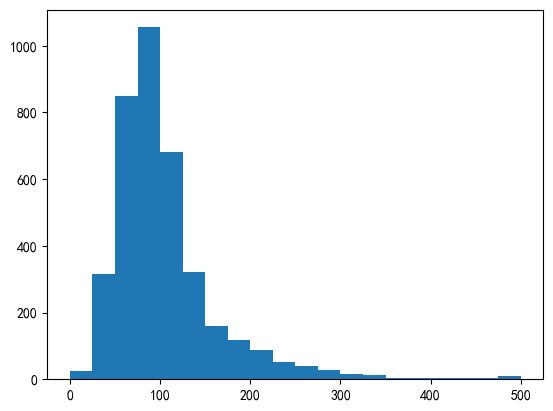

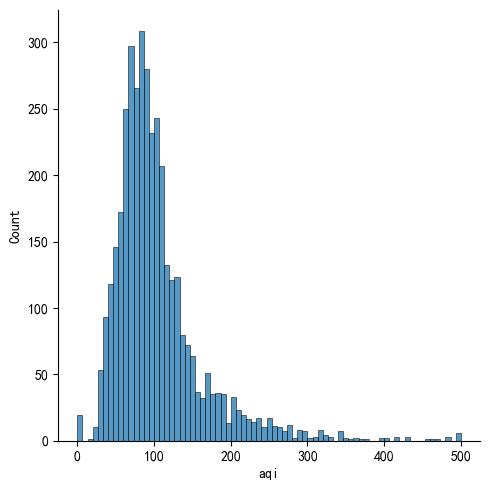

In [53]:
import seaborn as sns
datex = date['aqi']
plt.hist(datex, bins=20)
sns.displot(datex)


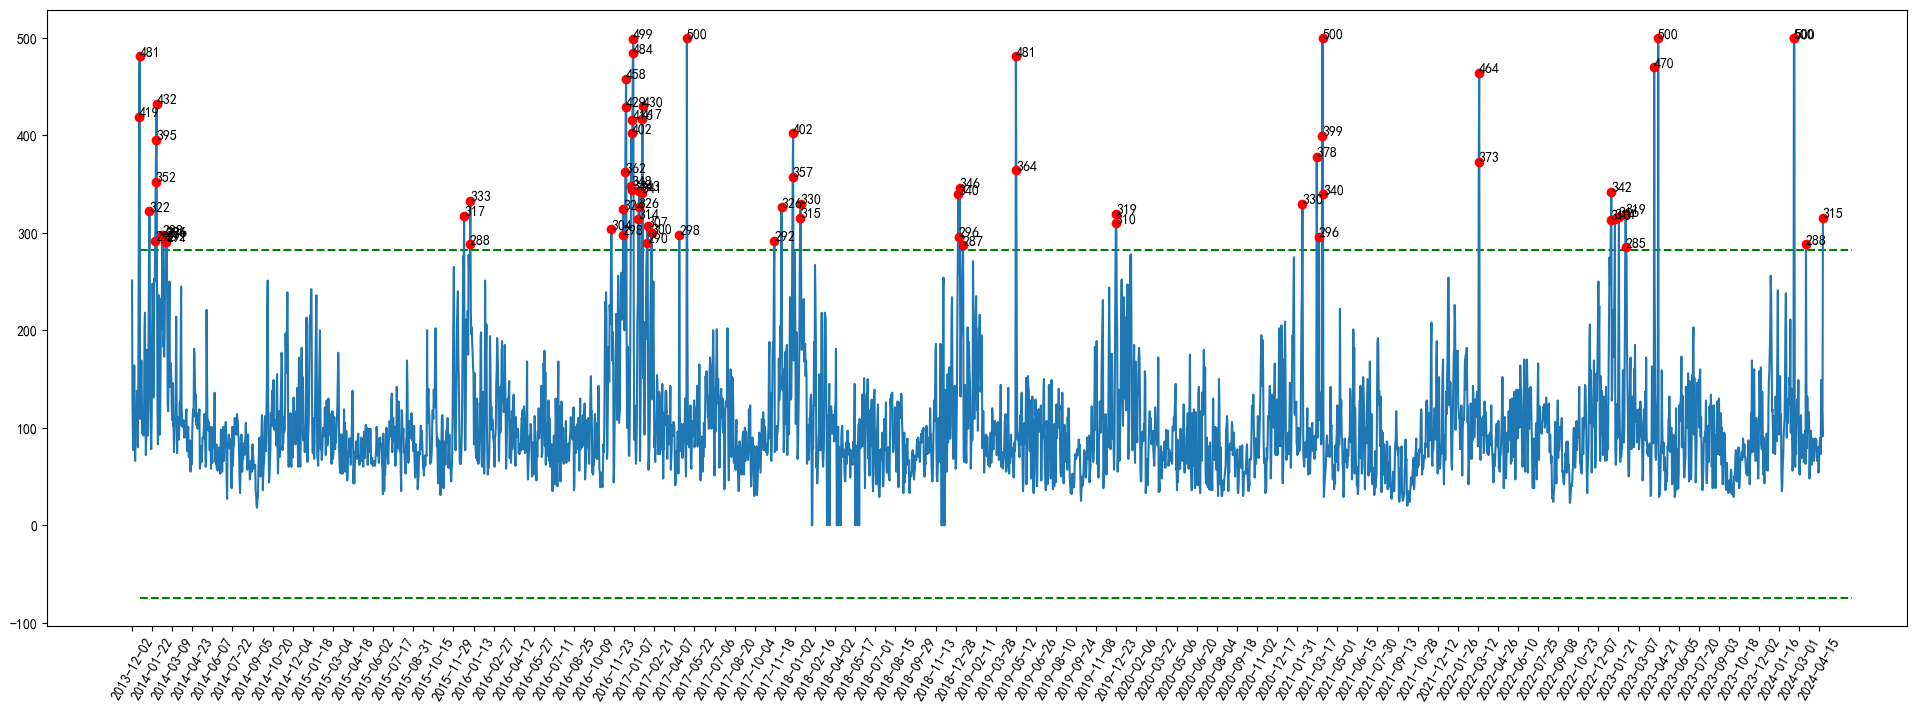

In [48]:
#3sigma
n = 3
date = pd.read_excel('date.xlsx', index_col=False)
date_x = date['aqi']
date_y = date['time_point']

xmean = np.mean(date_x)
xstd = np.std(date_x) #标准差
threshold1 = xmean - n * xstd
threshold2 = xmean + n * xstd

outpoint = []
outpoint_y = []

for i in range(0, len(date_x)):
    if (date_x[i] < threshold1)|(date_x[i] > threshold2):
        outpoint.append(date_x[i])
        outpoint_y.append(date_y[i])
    else:
        continue

outpoint, outpoint_y

plt.figure(figsize=(24, 8))
plt.rcParams['axes.unicode_minus'] =False
plt.axhline(y = threshold1, xmin=0.05, xmax=0.97, color='g', linestyle='--')
plt.axhline(y = threshold2, xmin=0.05, xmax=0.97, color='g', linestyle='--')
plt.xticks(range(0, len(date_y), 45), rotation=60)
plt.plot(date_y, date_x)
plt.plot(outpoint_y, outpoint, 'ro')
for i in range(len(outpoint)):
    plt.annotate(outpoint[i], xy=(outpoint_y[i], outpoint[i]), xytext=(outpoint_y[i], outpoint[i]))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x25feb014e90>,
 'caps': [<matplotlib.lines.Line2D at 0x25feafc2010>,
 'boxes': [<matplotlib.lines.Line2D at 0x25feb017ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x25feb022c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x25feb023450>,
 'means': []}

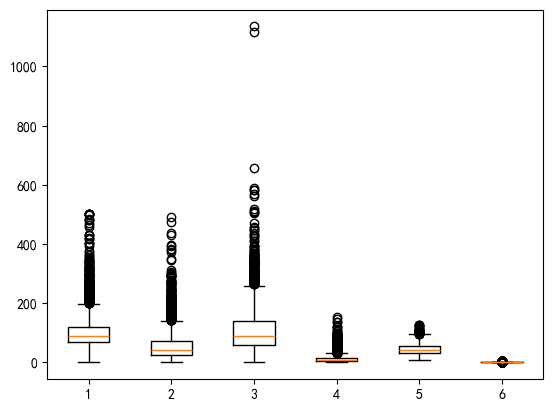

In [7]:
#箱线图
inp = [y, o, p, q, r, s]
plt.boxplot(inp)

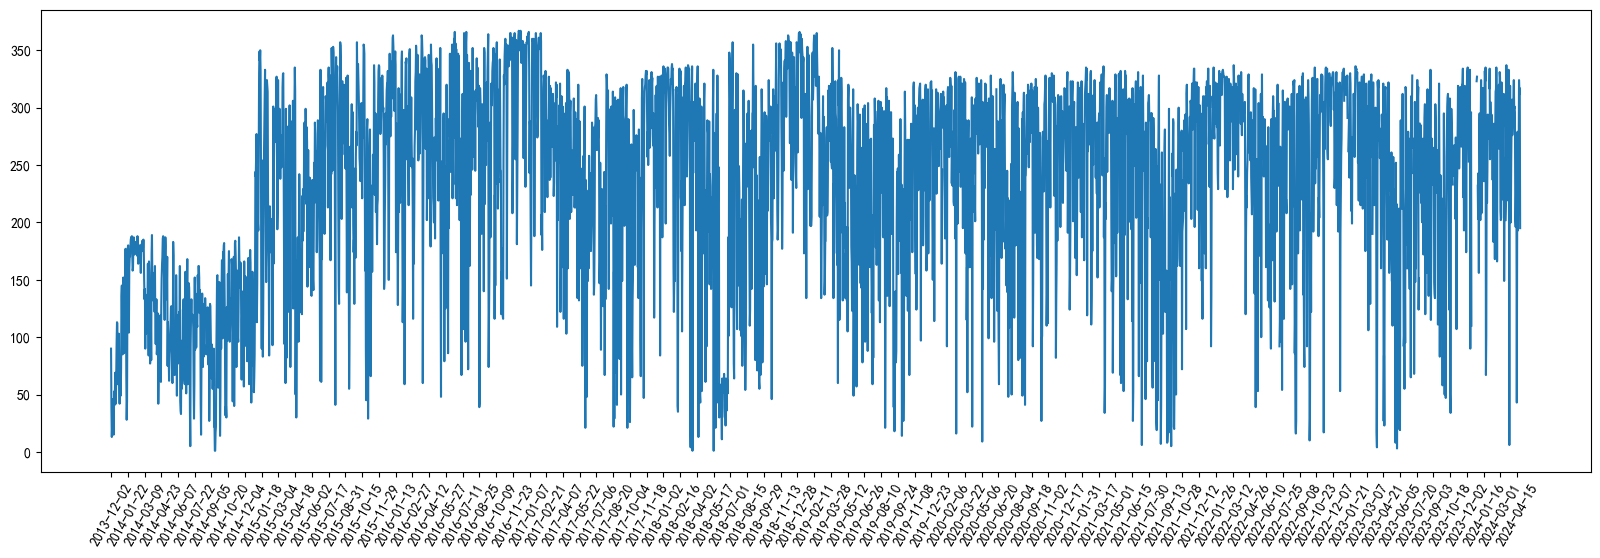

In [8]:
plt.figure(figsize=(20, 6))
plt.xticks(range(0, len(x), 45), rotation = 60)
plt.plot(x, z)